In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.tsa.api as smt


In [3]:
df = pd.read_csv("C:/Users/SCIENCE/Documents/time3.csv", parse_dates=True, index_col=[0])
df

,Units Sold,Total Revenue
Order Date,,
2015-08-31,3604,2408445.08
2010-11-20,8435,2153286.80
2017-06-22,4848,2045322.72
2012-02-28,7225,3048155.25
2010-08-12,1975,406257.50
...,...,...
2010-11-16,39,363.87
2013-12-14,8856,1351248.48
2010-02-18,261,2435.13


Order Date
2010-01-01     7529487.87
2010-02-01     6680813.31
2010-03-01     6290877.60
2010-04-01     2389855.82
2010-05-01    10833088.52
                 ...     
2017-02-01     9637114.62
2017-03-01     8129230.06
2017-04-01     4457534.50
2017-05-01     9844060.30
2017-06-01     2850432.52
Freq: MS, Name: Total Revenue, Length: 90, dtype: float64

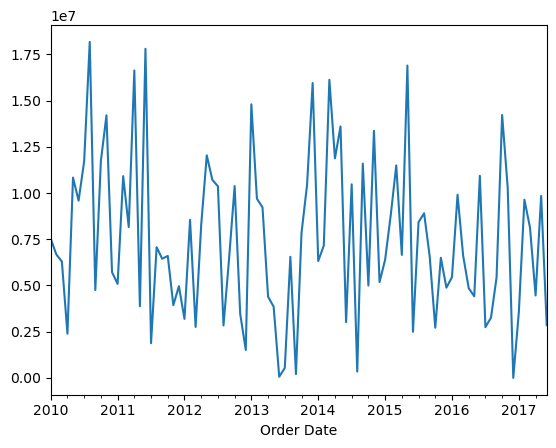

In [4]:
ts =df["Total Revenue"].resample("MS").sum()
ts.plot()
ts

Order Date
2010-01-01    27177
2010-02-01    24441
2010-03-01    41143
2010-04-01    31147
2010-05-01    31216
              ...  
2017-02-01    35949
2017-03-01    18137
2017-04-01    17337
2017-05-01    41260
2017-06-01     8762
Freq: MS, Name: Units Sold, Length: 90, dtype: int64

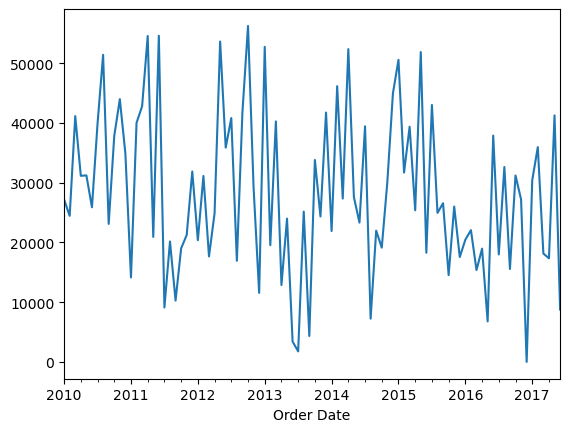

In [5]:
ts1 =df["Units Sold"].resample("MS").sum()
ts1.plot()
ts1

In [6]:
ts.dropna()
ts1.dropna()
x=ts
y=ts1



x=x.array.reshape(-1,1)

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state = 0)

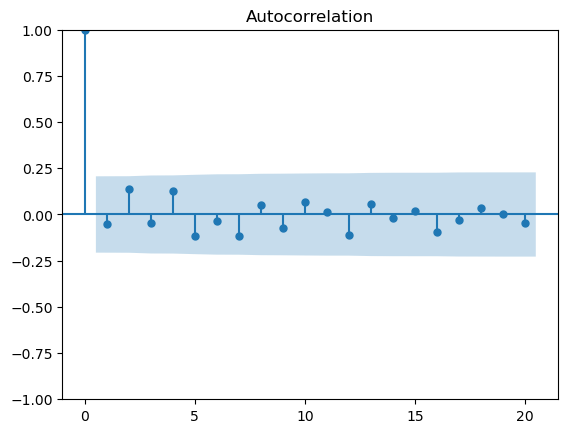

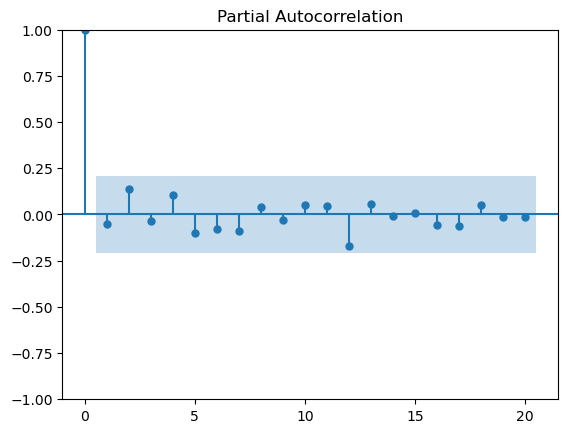

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(ts)
pacf = plot_pacf(ts)

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

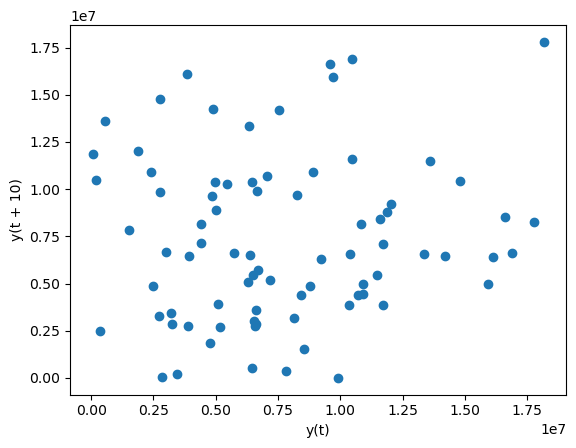

In [9]:
pd.plotting.lag_plot(ts, lag=10)

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

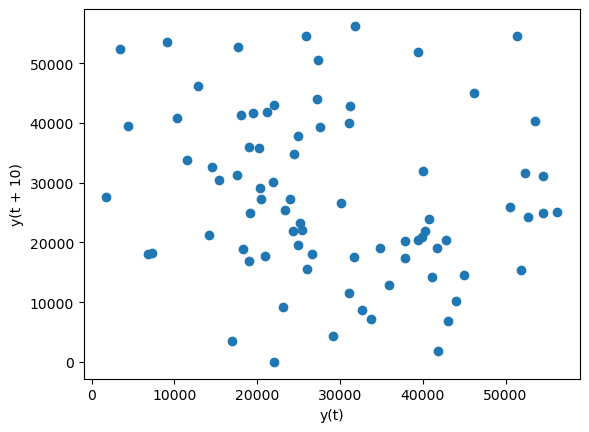

In [10]:
pd.plotting.lag_plot(ts1, lag=10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

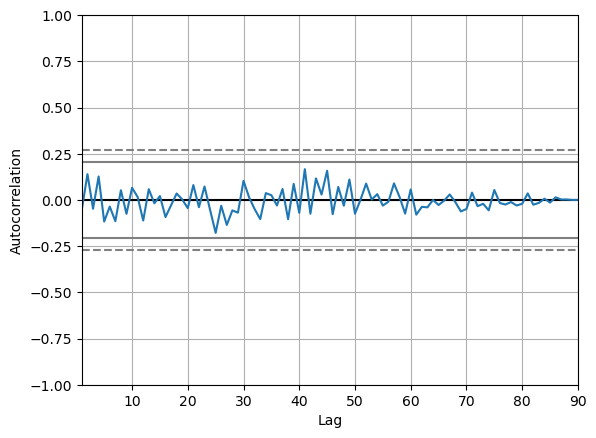

In [11]:
pd.plotting.autocorrelation_plot(ts)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

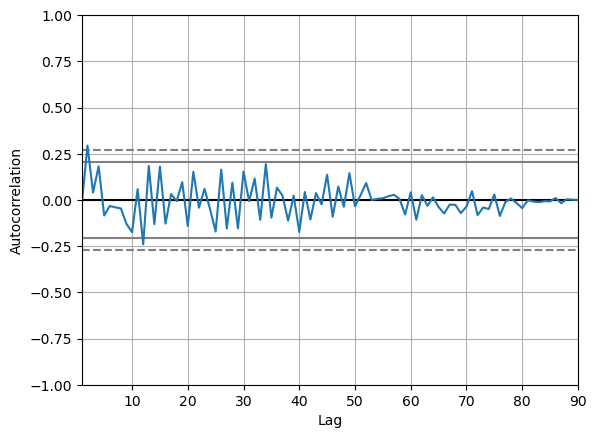

In [12]:
pd.plotting.autocorrelation_plot(ts1)

In [14]:
constants=sm.add_constant(x_train)
model=sm.OLS(y_train, constants)
model

In [15]:
results=model.fit()
results.params

const    12155.257342
x1           0.002107
dtype: float64

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Units Sold   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     55.19
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           4.24e-10
Time:                        23:16:57   Log-Likelihood:                -668.54
No. Observations:                  63   AIC:                             1341.
Df Residuals:                      61   BIC:                             1345.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.216e+04   2538.651      4.788      0.000    7078.912    1.72e+04
x1             0.0021      0.000      7.429      0.000       0.002       0.003
==============================================================================
Omnibus:                        3.068   Durbin-Watson:                   2.312
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.973
Skew:                           0.485   Prob(JB):                        0.226
Kurtosis:                       2.562   Cond. No.                     1.81e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
### HYPOTHESIS TESTING
H0: No +ve/-ve autocorrelation
H1: Autocorrelation
    
## Decision Rule
if dw < dl; reject H0
   dw > du: accept H1
   dl < dw < du: test is inconclusive
    
    alpha = .005
    n= 499
    k = 1